In [1]:
# import the necessary librares
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : True})

# Read the data
data = pd.read_csv('./ANSUR_II_MALE_Public.csv', encoding='latin-1')
data.head()

subjectid  abdominalextensiondepthsitting  acromialheight  \
0      10027                             266            1467   
1      10032                             233            1395   
2      10033                             287            1430   
3      10092                             234            1347   
4      10093                             250            1585   

   acromionradialelength  anklecircumference  axillaheight  \
0                    337                 222          1347   
1                    326                 220          1293   
2                    341                 230          1327   
3                    310                 230          1239   
4                    372                 247          1478   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      253               202                401   
1                      245               193                394   
2                      256               196                427   
3                      262               199                401   
4                      267               224                435   

   bicepscircumferenceflexed  ...                  Branch  PrimaryMOS  \
0                        369  ...             Combat Arms         19D   
1                        338  ...          Combat Support         68W   
2                        408  ...          Combat Support         68W   
3                        359  ...  Combat Service Support         88M   
4                        356  ...  Combat Service Support         92G   

   SubjectsBirthLocation  SubjectNumericRace  Ethnicity  DODRace  Age  \
0           North Dakota                   1        NaN        1   41   
1               New York                   1        NaN        1   35   
2               New York                   2        NaN        2   42   
3              Wisconsin                   1        NaN        1   31   
4         North Carolina                   2        NaN        2   21   

   Heightin  Weightlbs  WritingPreference  
0        71        180         Right hand  
1        68        160          Left hand  
2        68        205          Left hand  
3        66        175         Right hand  
4        77        213         Right hand  

[5 rows x 108 columns]

# 1) Pre-processing
## 1.1) Missing values check

In [2]:
# Data Pre-processing

# 1) Check for missing values

# the count of missing values
missing_entry_count = data.isnull().sum()
# total values
total_entry_count = data.isnull().count() 
# the percentage of missing values
missing_entry_percentage = round(missing_entry_count/total_entry_count *100, 2) 
# dataframe of columns with the number of missing values and its percentage
missing_data_df = pd.DataFrame({'missing entries count': missing_entry_count, 'percentage of entries missing': missing_entry_percentage})
# print any features which have missing values, with number of missing values and percentage of missing values
print("Columns with missing entries are :\n")
missing_data_df[missing_data_df['missing entries count']!=0]

Columns with missing entries are :



missing entries count  percentage of entries missing
Ethnicity                   3180                           77.9

## 1.2) check duplicates

In [3]:
# 2) check if there are any duplicate records
data[data.duplicated() == True].shape[0]

0

## 1.3) feature selection

While it is technically possible to use PCA on discrete variables, or categorical variables that have been one hot encoded variables, you should not. Simply put, if your variables don’t belong on a coordinate plane, then do not apply PCA to them.

Height or length ------- (Heightin)

Weight  ---------  (weightkg)

Mid-upper arm circumference (MUAC) -------- (shouldercircumference)

Demi-span or arm span  ------------ (forearmcircumferenceflexed)

Knee height --------- (kneeheightmidpatella)

Sitting height  --------- (sittingheight)

Skin fold thickness  --------- ()

Head circumference  ---------- (headcircumference)

(thighcircumference)

(hipbreadth)

(neckcircumference)


In [4]:
# 3) feature selection

# drop column Ethnicity, since missing values percentage is extremely high, no use of imputation
data1 = data.drop("Ethnicity", axis=1)

# dropping non-numerical columns
data2 = data1.select_dtypes('number')

# remove ID column
data3 = data2.drop("subjectid", axis=1)

# select common 10 features used for anthropometric data
selected_features = ["Heightin", "weightkg", "shouldercircumference", "forearmcircumferenceflexed", "kneeheightmidpatella", 
                     "sittingheight", "headcircumference", "thighcircumference", "hipbreadth", "neckcircumference"]
ansur_male = data3[selected_features]

# separate out target variable values
target_var = data['Component']


Histogram plots for the selected features:



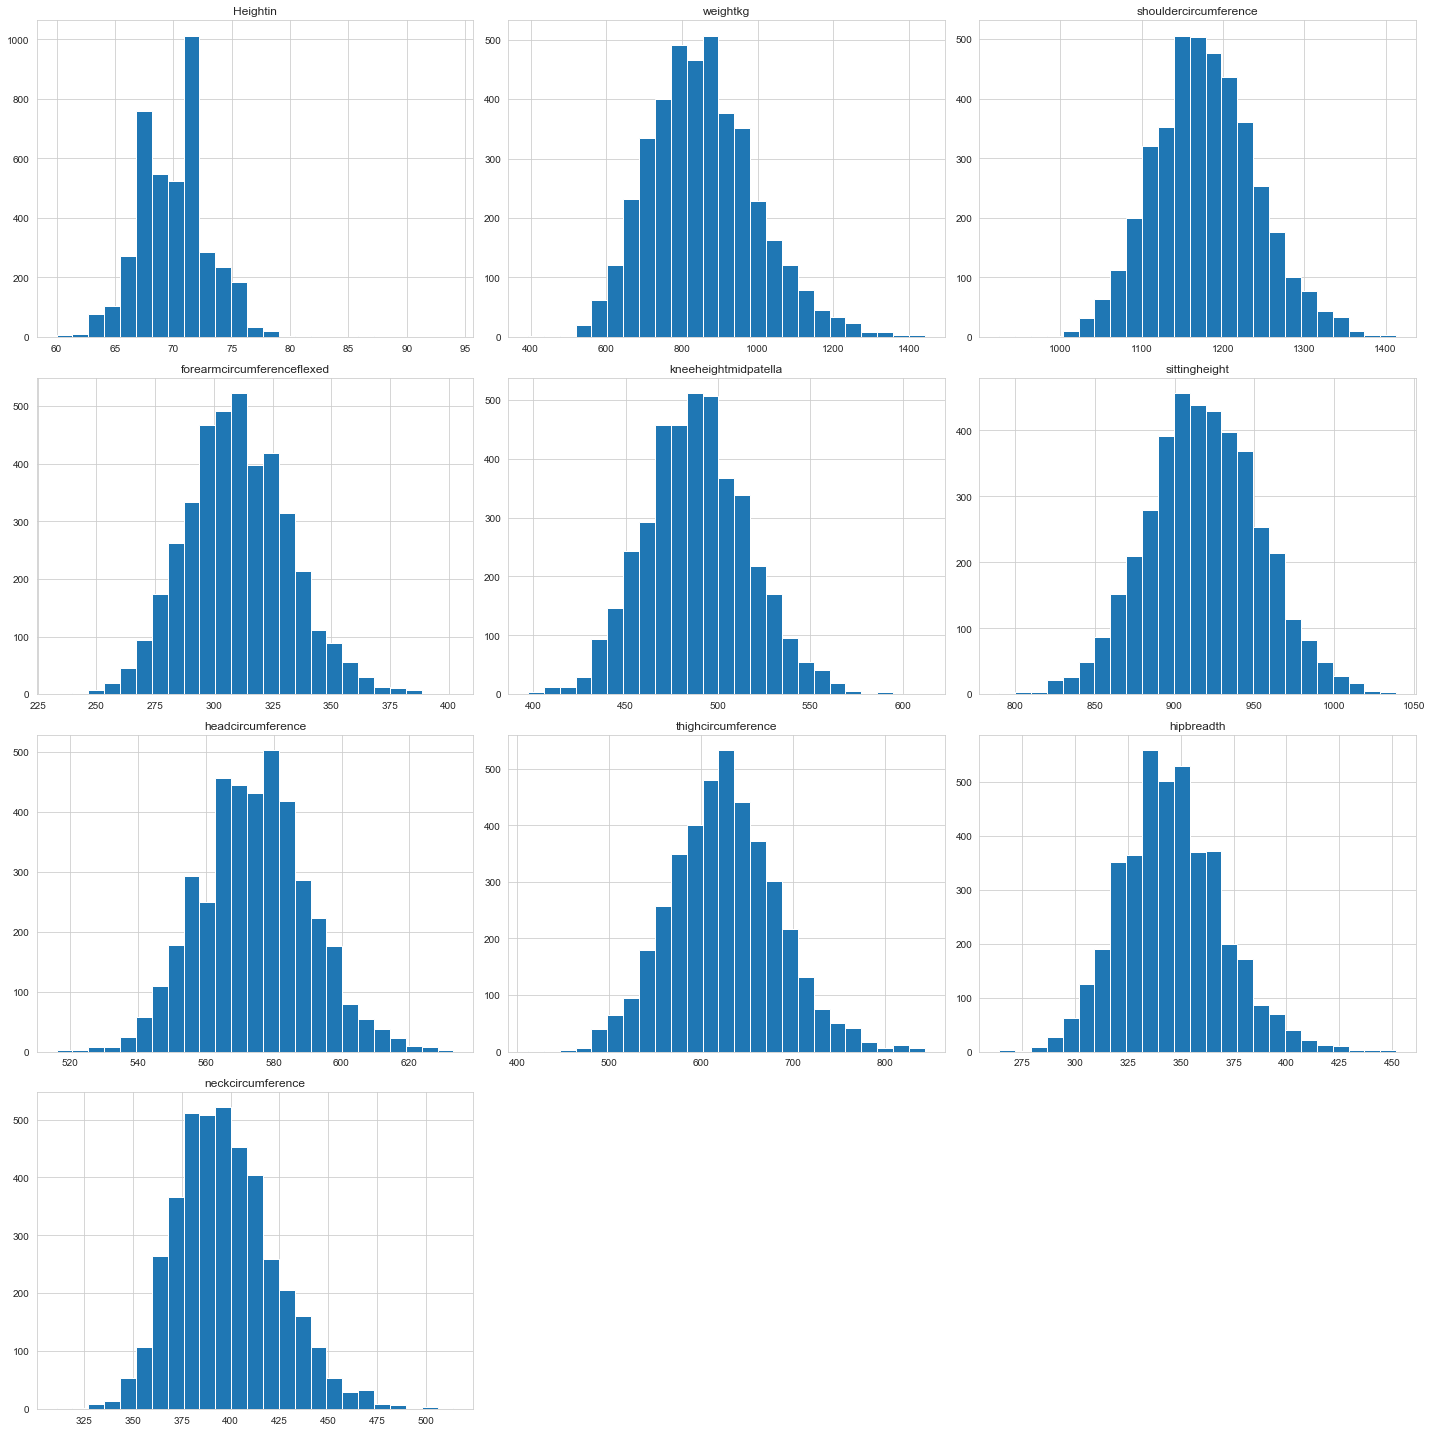

Pair plot for the selected features:



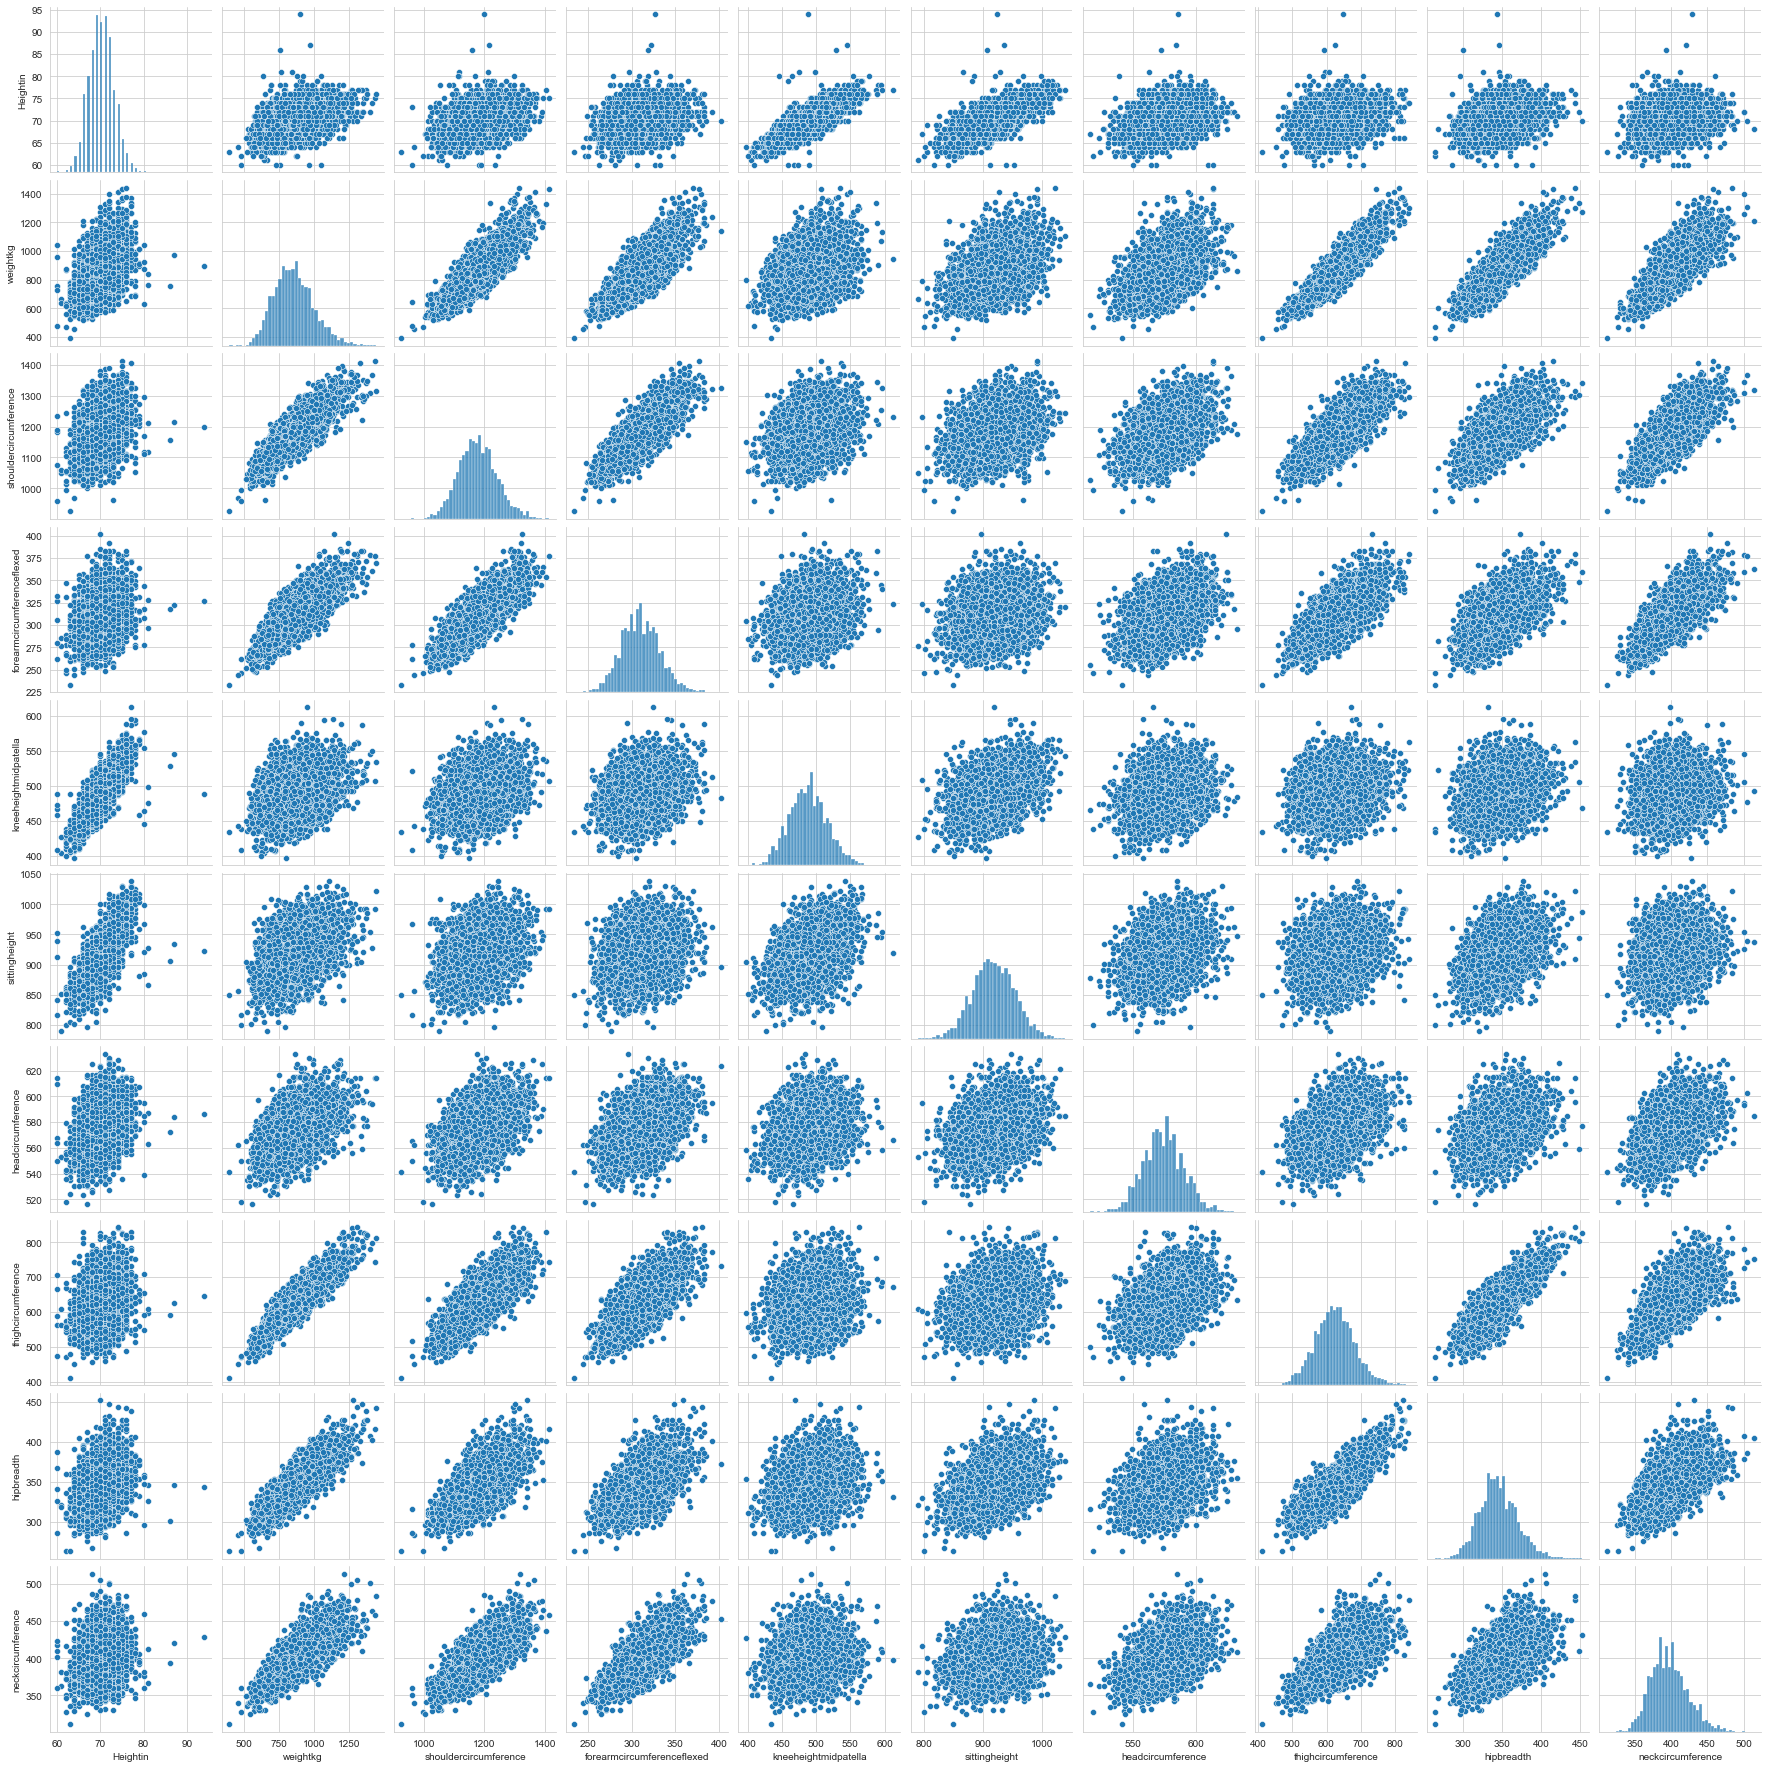


Heat map for correlation between selected features:



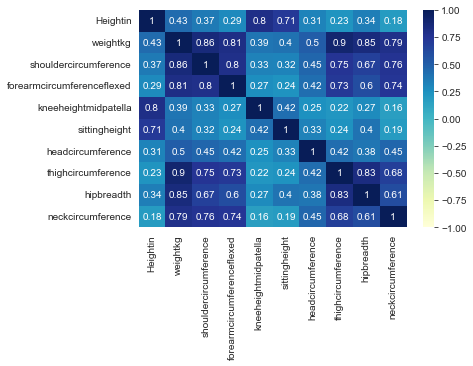

In [5]:
# Exploratory Data Analysis (EDA)

# 1) Univariate Analysis
# histogram plot for selected feature data
print("\nHistogram plots for the selected features:\n")
ax = ansur_male.hist(bins = 25, figsize = (20,20))
plt.tight_layout()
plt.savefig('./FiguresCW1/Histogram plot.png',format='png')
plt.show()

# 2) Bivariate Analysis
# pair plot for the selected features, to see if they have correlations and how they affect each other
print("Pair plot for the selected features:\n")
sns.pairplot(ansur_male)
plt.savefig('./FiguresCW1/Pair plot 1.png',format='png')
plt.show()

# 3) Multivariate Analysis
# heat map to visualize correlation matrix for the selected features
print("\nHeat map for correlation between selected features:\n")
sns.heatmap(ansur_male.corr(), vmax=1, vmin=-1, cmap='YlGnBu', annot=True)
plt.savefig('./FiguresCW1/Heat map.png',format='png')
plt.show()

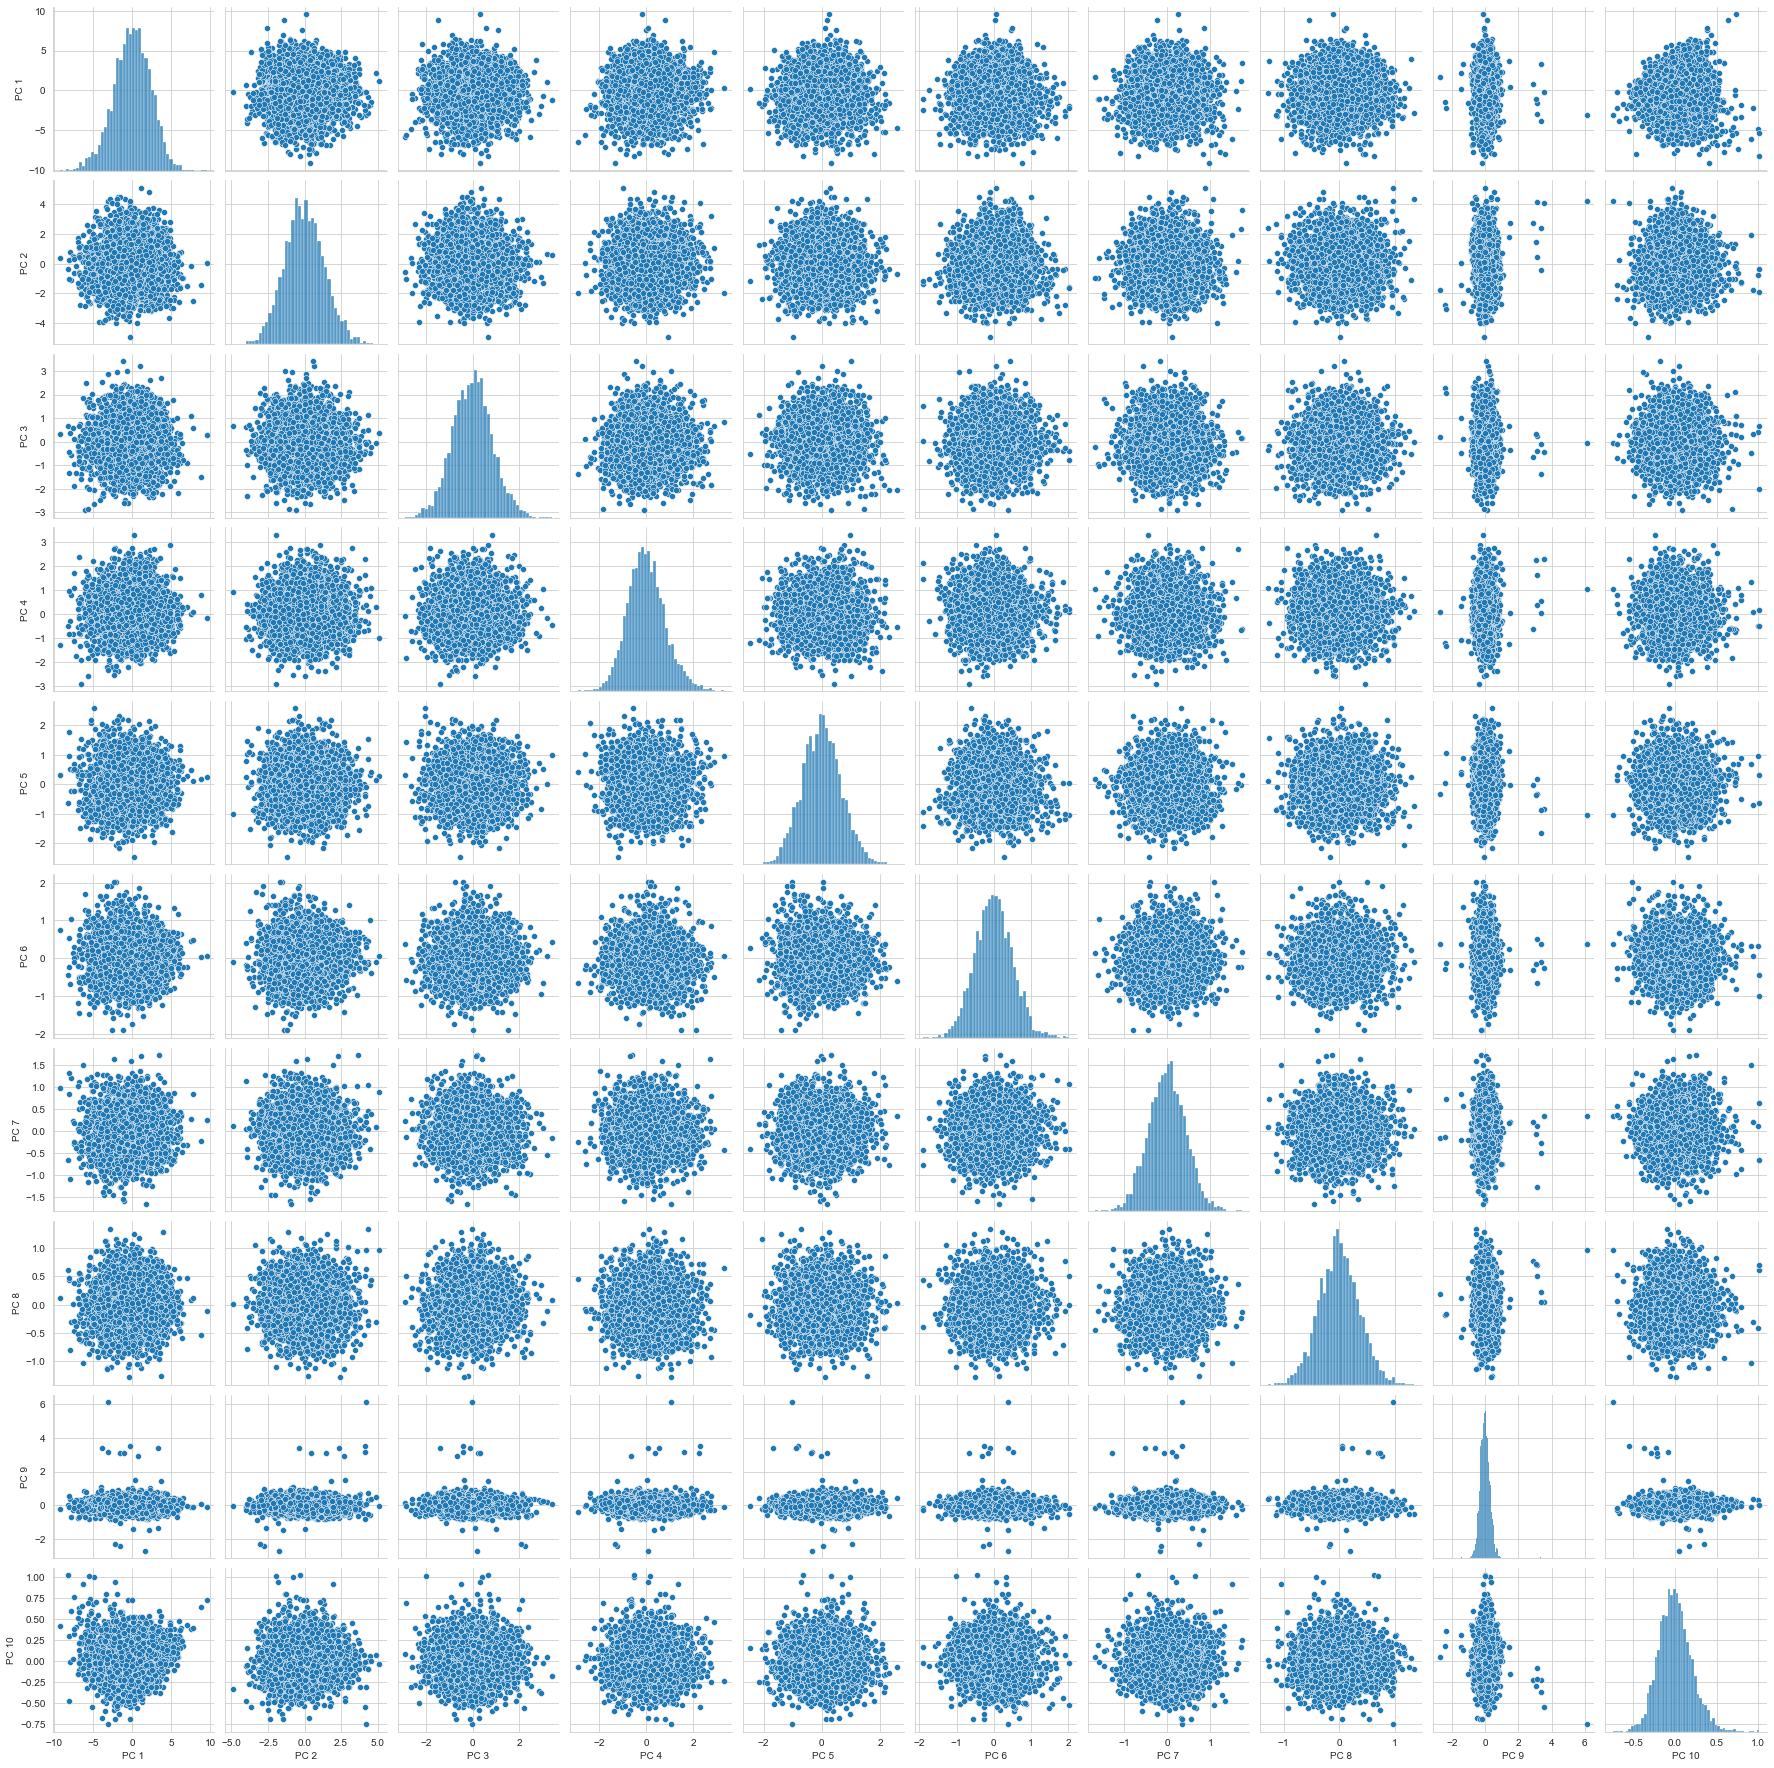

In [6]:
# PRINCIPAL COMPONENT ANALYSIS (PCA)

# import PCA and standard scaler methods from sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# using standard scaler to standardize the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_male)

# create PCA instance, fit and transform the standardized data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)
# store PCA result in a dataframe
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10'])

# pairplot of the pricipal component dataframe
sns.pairplot(pc_df)
plt.savefig('./FiguresCW1/Pair plot 2.png',format='png')
plt.show()

In [7]:
# calculate the explained variance ratio per component (the eigen values)
var_explained = pca.explained_variance_ratio_
print(var_explained)

[0.56252192 0.1837345  0.07223625 0.06313273 0.04501062 0.02591027
 0.01914337 0.0129135  0.0113099  0.00408694]


In [8]:
# calculate the cumulative sum of the explained variance ratio for each principal component
cum_var_exp = pca.explained_variance_ratio_.cumsum()
print(cum_var_exp)

[0.56252192 0.74625642 0.81849267 0.8816254  0.92663603 0.9525463
 0.97168967 0.98460316 0.99591306 1.        ]


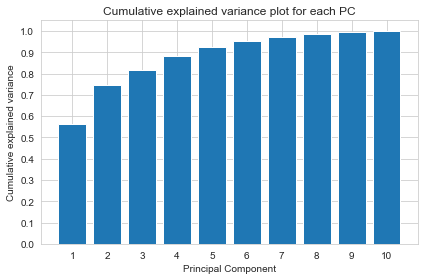

In [9]:
# plot the bargraph for cumulative explained variance for each principal component
PC_values = np.arange(pca.n_components_) + 1
plt.bar(PC_values, cum_var_exp, align='center')
plt.title('Cumulative explained variance plot for each PC')
plt.ylabel('Cumulative explained variance')
plt.xlabel('Principal Component')
plt.xticks(np.arange(1, 11))
plt.yticks(np.arange(0, 1.1, step=0.1)) 
plt.tight_layout()
plt.savefig('./FiguresCW1/PCA cumulative plot.png',format='png')
plt.show()

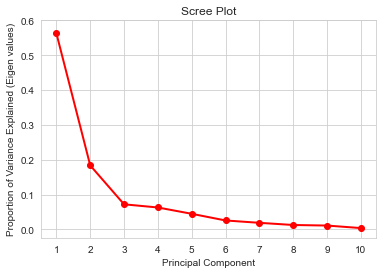

In [10]:
# create the scree plot for the explained variance ratio for each principal component
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained (Eigen values)')
plt.xticks(np.arange(1, 11))
plt.yticks(np.arange(0, 0.7, step=0.1)) 
plt.savefig('./FiguresCW1/PCA Scree plot.png',format='png')
plt.show()

In [11]:
# calculate the loadings for each feature given by each principal component (PC)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], index=ansur_male.columns)
print("Loadings for the features given by each PC:\n")
print(loadings)

Loadings for the features given by each PC:

                                 PC1       PC2       PC3       PC4       PC5  \
Heightin                   -0.231184  0.581740 -0.082651  0.079074 -0.063547   
weightkg                   -0.407730 -0.093759 -0.099383 -0.051616  0.082882   
shouldercircumference      -0.372903 -0.123890 -0.066156  0.159057 -0.253060   
forearmcircumferenceflexed -0.351160 -0.181585 -0.065439  0.257186 -0.363765   
kneeheightmidpatella       -0.203177  0.513946 -0.228001  0.516736  0.306676   
sittingheight              -0.213493  0.461977  0.138613 -0.612631 -0.424146   
headcircumference          -0.249474  0.042566  0.910421  0.110804  0.290205   
thighcircumference         -0.363011 -0.224753 -0.156183 -0.170510  0.360104   
hipbreadth                 -0.352261 -0.090048 -0.208905 -0.425245  0.420883   
neckcircumference          -0.336124 -0.257814  0.080828  0.187411 -0.357411   

                                 PC6       PC7       PC8       PC9      PC

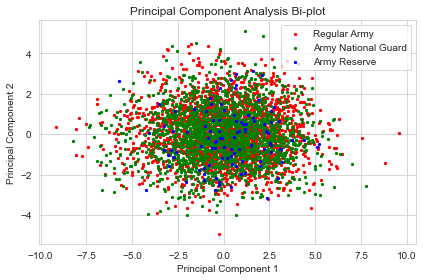

In [12]:
plt.figure()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Principal Component Analysis Bi-plot")
targets = target_var.unique().tolist()
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = data['Component'] == target
    plt.scatter(pc_df.loc[indicesToKeep, 'PC 1']
               , pc_df.loc[indicesToKeep, 'PC 2'], c = color, s = 5)

plt.legend(targets)
plt.tight_layout()
plt.savefig('./FiguresCW1/PCA Bi-plot.png',format='png')
plt.show()


# Factor Analysis

In [13]:
# FACTOR ANALYSIS (FA)

# import the factor analyser libraries
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# Step 1 : perform the Bartlett's test to check if factor analysis can be performed for the data
chi_square_value, p_value = calculate_bartlett_sphericity(ansur_std)
chi_square_value, p_value
print("Bartlett's Test result? [True/False] : ", (p_value==0))

Bartlett's Test result? [True/False] :  True


Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the 
observed correlation matrix against the identity matrix. 
If the test found statistically insignificant, you should not employ a factor analysis.

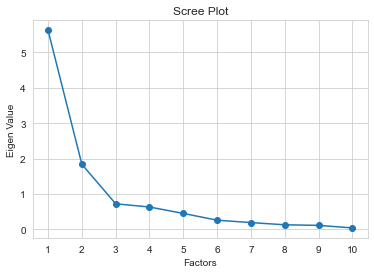

In [14]:
# Step 2 : select number of features using scree plot

# initialize the factor analyzer and fit the standardized data to it
fa = FactorAnalyzer(rotation = None, impute = "drop", n_factors = ansur_std.shape[1])
fa.fit(ansur_std)

# get the eigen values from the factor analysis
ev,_ = fa.get_eigenvalues()

# create scree plot for eigen values of each factor
plt.scatter(range(1, ansur_std.shape[1]+1), ev)
plt.plot(range(1, ansur_std.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.xticks(np.arange(1, 11))
plt.savefig('./FiguresCW1/FA Scree plot.png',format='png')
plt.show()

From the graph, we can see that the eigenvalues drop below 1 from the 3rd factor. So, the optimal number of factors is 2.

Eigenvalues are nothing but the amount of variance the factor explains. We will select the number of factors whose eigenvalues are greater than 1.

But why should we choose the factors whose eigenvalues are greater than 1? The answer is very simple. In a standard normal distribution with mean 0 and Standard deviation 1, the variance will be 1. Since we have standard scaled the data the variance of a feature is 1. This is the reason for selecting factors whose eigenvalues(variance) are greater than 1 i.e. the factors which explain more variance than a single observed variable.

In [15]:
# Step 3: perform factor analysis on the data using the number of features calculated in previous step

# initialize the factor analyzer and fit the standardized data to it
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(ansur_std)

# print the loadings for each feature for each factor
print(pd.DataFrame(fa.loadings_, index=ansur_male.columns))

                                   0         1
Heightin                    0.137639  1.011473
weightkg                    0.949057  0.308515
shouldercircumference       0.849851  0.239134
forearmcircumferenceflexed  0.819853  0.155905
kneeheightmidpatella        0.158673  0.721888
sittingheight               0.211535  0.643205
headcircumference           0.459278  0.263165
thighcircumference          0.893402  0.106596
hipbreadth                  0.771770  0.250369
neckcircumference           0.826803  0.056683


Loadings indicate how much a factor explains a variable. The loading score will range from -1 to 1.Values close to -1 or 1 indicate that the factor has an influence on these variables. Values close to 0 indicates that the factor has a lower influencer on the variable.

For example, in Factor 0, we can see that the features ‘thighcircumference’, 'shouldercircumference', 'neckcircumference', 'forearmcircumferenceflexed' and ‘weightkg’ have high loadings than other variables. 


In [16]:
# print the variances for each factor
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1
Variance          4.672320  2.281101
Proportional Var  0.467232  0.228110
Cumulative Var    0.467232  0.695342


The first row represents the variance explained by each factor. Proportional variance is the variance explained by a factor out of the total variance. Cumulative variance is nothing but the cumulative sum of proportional variances of each factor. In our case, the 2 factors together are able to explain 69% of the total variance.